In [1]:
import torch
import random
import unidecode
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [2]:
ALPHABET = 'abcdefghijklmnopqrstuvwxyz-^*'
N = len(ALPHABET)

def normalize(s):
    global ALPHABET
    s = unidecode.unidecode(s)
    s = s.lower()
    s = ''.join(c for c in s if c in ALPHABET)
    return s

normalize('HéRésIe!')

'heresie'

In [3]:
def extract_from_txt(file_name_in, file_name_out):
    """extract unique words from a text file and write them to another file (one per line); also normalize them"""
    words_list = []
    with open(file_name_in, 'r', encoding='UTF8') as f:
        for line in f.readlines():
            for word in line.split():
                word = normalize(word)
                if word not in words_list:
                    words_list.append(word)
    words_list.remove('')
    words_list.remove('-')
    words_list.sort()
    with open(file_name_out, 'w', encoding='UTF8') as f:
        for word in words_list:
            f.write(word + '\n')
    return len(words_list)

# BOOK_FILE = 'twilight.txt'
BOOK_FILE = 'a_tale_of_two_cities.txt'
WORDS_FILE = 'words_raw.txt'
extract_from_txt(BOOK_FILE, WORDS_FILE)


11045

In [4]:
def normalize_txt(file_name_in, file_name_out):
    """normalize a text file and write it to another file"""
    c = 0
    with open(file_name_in, 'r', encoding='UTF8') as f:
        with open(file_name_out, 'w', encoding='UTF8') as g:
            prev = ''
            for line in f.readlines():
                n_line = normalize(line)
                if n_line == prev or n_line == '-' or n_line == '*' or n_line == '^'\
                    or n_line.count('-')>1 or n_line.count('*')>1 or n_line.count('^')>1:
                    pass
                else:
                    g.write(n_line+'\n')
                    prev = n_line
                    c += 1
    return c

normalize_txt('mots_brut.txt', 'mots.txt'), normalize_txt('words_raw.txt', 'words.txt')


(22014, 10327)

In [5]:
def txt_to_js(file_name):
    """put list of word from a txt file in a js variable, loadable from a file"""
    with open(file_name+'.txt', 'r') as f:
        with open(file_name+'.js', 'w') as g:
            g.write("const ALPHABET = 'abcdefghijklmnopqrstuvwxyz-*';\n")
            g.write("const WORDS_LIST = [\n")
            for line in f.readlines():
                if line != '\n':
                    g.write('\t\'^' + line[:-1] + '*\',\n')
            g.write('];\n')

txt_to_js('mots')
txt_to_js('words')

In [6]:
DICTIONARY_FILE = 'words.txt'
WORDS_LIST = []
with open('words.txt', 'r', encoding='UTF8') as f:
    for line in f.readlines():
        WORDS_LIST.append('^'+line.strip()+'*')

In [7]:
letters_usage = np.zeros(N)
words_lengths = np.zeros(30)

for word in WORDS_LIST:
    for ch in word:
        if ch != '^' and ch != '*':
            letters_usage[ALPHABET.index(ch)] += 1
    words_lengths[len(word)] += 1


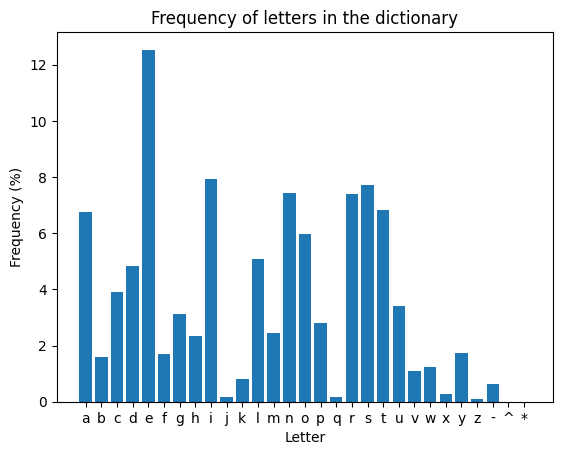

In [8]:
plt.bar(range(N), 100*letters_usage/sum(letters_usage))
plt.xticks(range(N), ALPHABET)
plt.xlabel('Letter')
plt.ylabel('Frequency (%)')
plt.title('Frequency of letters in the dictionary')
plt.show()


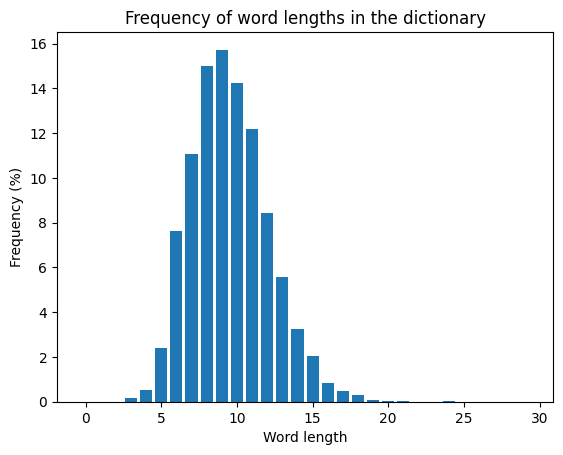

In [9]:
plt.bar(range(30), 100*words_lengths/sum(words_lengths))
plt.xlabel('Word length')
plt.ylabel('Frequency (%)')
plt.title('Frequency of word lengths in the dictionary')
plt.show()


In [99]:
nextS = [np.zeros([N]*k) for k in range(1,7)]

for word in WORDS_LIST:
    l = [ALPHABET.index(ch) for ch in word]
    for k in range(1,len(nextS)+1):
        for i in range(len(l)-k+1):
            nextS[k-1][tuple(l[i:i+k])] += 1


In [129]:
def plot_next(letters):
    global nextS
    global Y
    used_letters = letters[-len(nextS)+2:]
    if used_letters != letters:
        print('Used letters:', used_letters)
    letters_indexes = tuple([ALPHABET.index(letter) for letter in used_letters])
    Y = nextS[min(len(letters_indexes)+1, len(nextS)-1)][letters_indexes]
    Ynorm = Y/Y.sum(axis=1, keepdims=True)
    plt.imshow(Ynorm*100, norm=mpl.colors.LogNorm())
    plt.xticks(range(N), ALPHABET)
    plt.yticks(range(N), [used_letters+ch for ch in ALPHABET])
    plt.clim(0.01,100)
    plt.colorbar(format=mticker.FuncFormatter(lambda x, y: str(int(x) if x>1 else x)+'%') )
    plt.show()


C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_27352\2369905483.py:9: RuntimeWarning: invalid value encountered in divide
  Ynorm = Y/Y.sum(axis=1, keepdims=True)


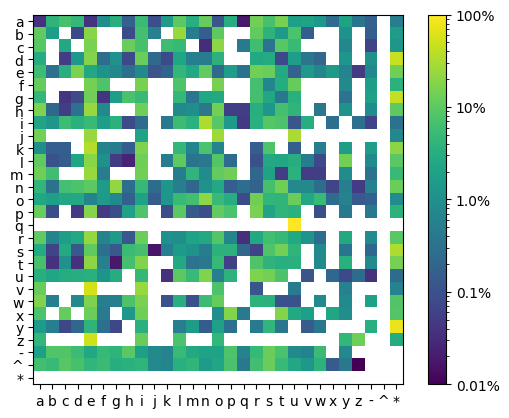

In [130]:
plot_next('')

C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_27352\2369905483.py:9: RuntimeWarning: invalid value encountered in divide
  Ynorm = Y/Y.sum(axis=1, keepdims=True)


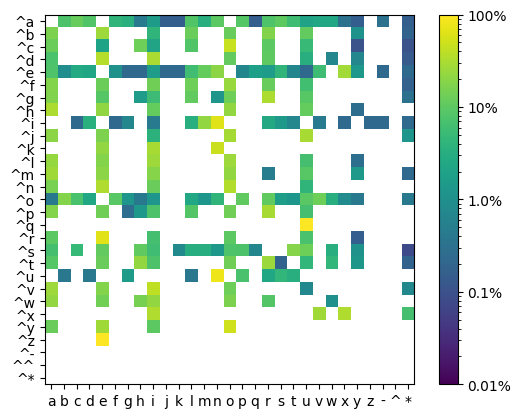

In [131]:
plot_next('^')

C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_27352\2369905483.py:9: RuntimeWarning: invalid value encountered in divide
  Ynorm = Y/Y.sum(axis=1, keepdims=True)


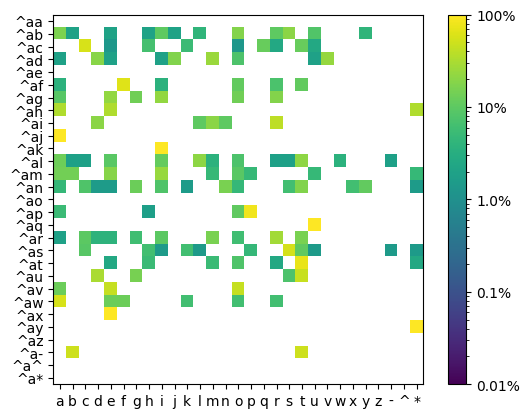

In [132]:
plot_next('^a')

C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_27352\2369905483.py:9: RuntimeWarning: invalid value encountered in divide
  Ynorm = Y/Y.sum(axis=1, keepdims=True)


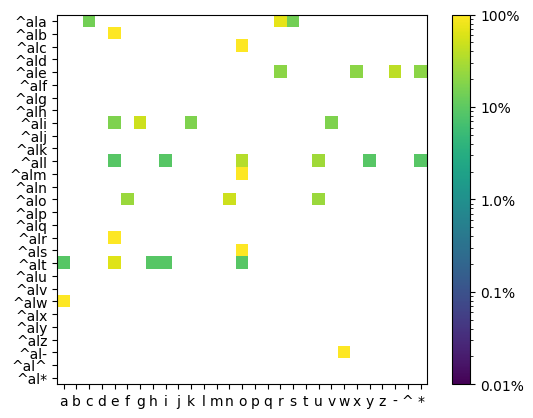

In [133]:
plot_next('^al')

C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_27352\2369905483.py:9: RuntimeWarning: invalid value encountered in divide
  Ynorm = Y/Y.sum(axis=1, keepdims=True)


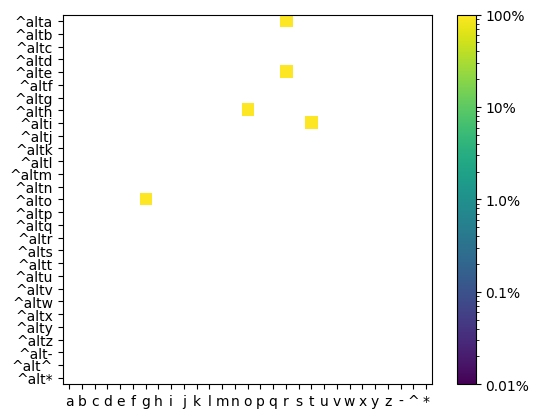

In [134]:
plot_next('^alt')

Used letters: alth


C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_27352\2369905483.py:9: RuntimeWarning: invalid value encountered in divide
  Ynorm = Y/Y.sum(axis=1, keepdims=True)


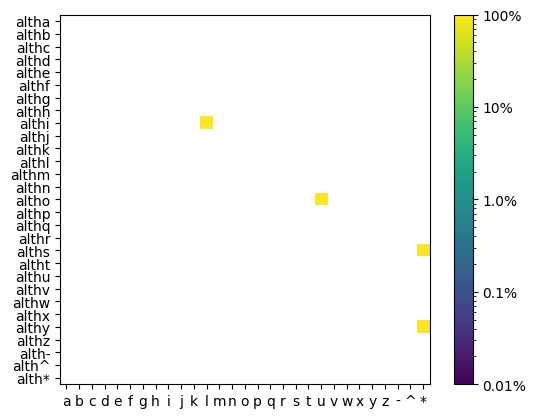

In [135]:
plot_next('^alth')

Used letters: lthi


C:\Users\PaulDubois\AppData\Local\Temp\ipykernel_27352\2369905483.py:9: RuntimeWarning: invalid value encountered in divide
  Ynorm = Y/Y.sum(axis=1, keepdims=True)


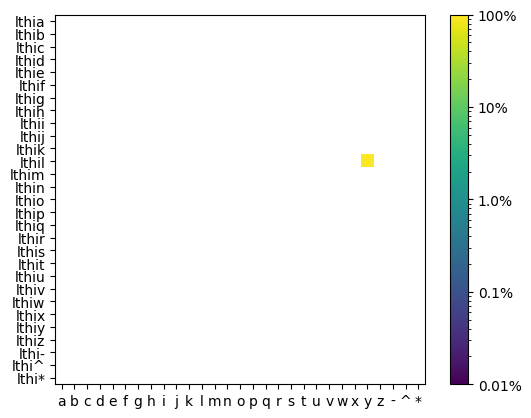

In [137]:
plot_next('^althi')